<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 3:</span> Principal Component Analysis</h1>
<hr>

Welcome to <span style="color:royalblue">Module 3: Principal Component Analysis</span>!

Principal Component Analysis, or PCA, is a popular dimensionality reduction technique.

PCA seeks to create new features by finding linear combinations of your original ones. These new features, called **principal components**, are meant to maximize the **"explained variance,"** which we'll explain further in the module.

* In this module, we'll prepare individual item features for our clustering algorithms, except this time we'll use PCA instead of thresholding.
* PCA is especially effective when you have many correlated features.
* Important: PCA creates new features that replace the original ones.


<br><hr id="toc">

### In this module...

In this module, we'll cover:
1. [Toy example: oval blob](#oval-blob)
2. [Principal components](#components)
3. [Dimensionality reduction](#reduction)
4. [Item data PCA](#item-data)
5. [Explained variance](#explained-variance)

<br><hr>

### First, let's import libraries and load the item data.

First, import libraries that you'll need.

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns',100)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn (added later)
from sklearn.decomposition import PCA


Next, let's import the full item data that we saved in the previous module (before applying thresholds).
* Remember, we saved it as <code style="color:crimson">'item_data.csv'</code>.
* This time, we'll also pass in the argument <code style="color:steelblue">index_col=0</code> to tell Pandas to treat the first column (CustomerID) as the index.

In [2]:
# Read item_data.csv
item_data = pd.read_csv('project_files/item_data.csv', index_col=0)

Just to confirm, this dataset should have 2574 features:

In [3]:
# Display item_data's shape
item_data.shape

(414, 2574)

<span id="oval-blob"></span>
# 1. Toy example: oval blob

PCA is an elegant technique that's very practical, but it can be a bit hard to try it on our larger dataset right away.

Instead, let's first use one last toy example to break down the intuition behind PCA.

<br>
**First, we'll create an "oval blob" synthetic dataset.**
* Instead of both input features and a target variable, we'll only have 2 input features.
* $x_1$ will be random samples from a normal distribution.
* $x_2$ will be random samples from a normal distribution **plus $x_1$**.

In [20]:
# Set random seed
np.random.seed(101)

# Create first feature: x1
x1 = np.random.normal(0, 1, 100)

# Create second feature: x2
x2 = np.random.normal(0, 1, 100) + x1

**Let's stack them together to form <code style="color:steelblue">X</code>, our input feature matrix.**
* We'll skip putting them in a Pandas DataFrame.
* Instead, we'll just stack them together as two separate columns in a matrix.

In [21]:
# Stack together as columns
X = np.stack([x1, x2],axis=1)

# Print shape of X
X.shape

(100, 2)

**Create a scaled version of your feature matrix and name it <code style="color:steelblue">X_scaled</code>.**
* You'll want to use <code style="color:steelblue">StandardScaler</code>.
* **Tip:** To fit and apply a transformation in one line of code, you can use the <code style="color:steelblue">.fit_transform()</code> function.
* Then, display the first 5 rows. 
    * You can't use <code style="color:steelblue">.head()</code> because it's not a dataframe.
    * You must **index/slice the array** instead.

In [22]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform X
X_scaled = scaler.fit_transform(X)

# Display first 5 rows of X_scaled
X_scaled[:5]

array([[ 2.45737416,  2.76968241],
       [ 0.44665735, -0.38363275],
       [ 0.71733989, -0.37695455],
       [ 0.3264168 , -0.60579169],
       [ 0.46889068,  0.39146426]])

**Plot a scatterplot of the scaled $x_1$ against the scaled $x_2$.**
* Label your axes as <code style="color:crimson">x1 (scaled)</code> and <code style="color:crimson">x2 (scaled)</code>.
* **Tip:** Call <code style="color:steelblue">plt.axis('equal')</code> after your scatterplot to put your plot's axes on the same scale.
* We have a recommended plot below. See the Answer Key for how to create it.

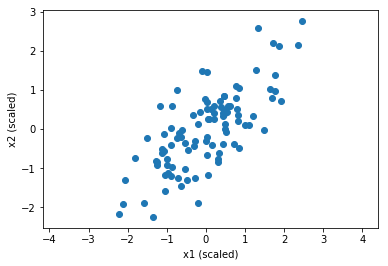

In [23]:
# Plot scatterplot of scaled x1 against scaled x2
plt.scatter(X_scaled[:,0], X_scaled[:,1])

# Put plot axes on the same scale
plt.axis('equal')

# Label axes
plt.xlabel('x1 (scaled)')
plt.ylabel('x2 (scaled)')

# Clear text residue
plt.show()

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="components"></span>
# 2. Principal components

As it turns out, this type of distribution is very helpful for visualizing the mechanics behind PCA.

<br>
**First, add the following import line to your library imports above. Then, re-run that code cell.**

<pre style="color:steelblue">
from sklearn.decomposition import PCA
</pre>

<br>
**Next, we can initialize an instance of the PCA transformation.**
* This is just as we did for the StandardScaler transformation. 
* Then, we can fit the instance with just one line of code.

In [24]:
# Initialize instance of PCA transformation
pca = PCA() 

# Fit the instance
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Let's display the principal components.**

In [25]:
# Display principal components
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

**Next, let's overlay the principal components on our oval blob.**
* We'll make the oval blob semi-transparent so we can see the principal components more easily.
* For clarity, we'll plot the first principal component in **black**, and we'll make it twice as long.
* We'll plot the first principal component in <strong style="color:red">red</strong>.

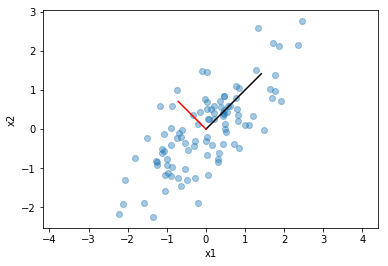

In [38]:
# Plot scaled dataset and make it partially transparent
plt.scatter(X_scaled[:,0], X_scaled[:,1], alpha=.4)

# Plot first principal component in black
plt.plot([0,2*pca.components_[0,0]], [0,2*pca.components_[0,1]], 'k')

# Plot second principal component in red
plt.plot([0,pca.components_[1,0]], [0,pca.components_[1,1]], 'r')

# Set axes
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
# Clear text residue
plt.show()

**Finally, we can transform our original features using the fitted PCA instance.**
* Remember, PCA generates new features that **replace** the original ones.
* We'll name these new features <code style="color:crimson">PC</code> (short for "principal component") to indicate that they are generated from PCA.

In [53]:
# Generate new features
PC = pca.transform(X_scaled)
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

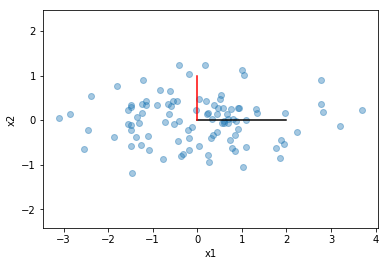

In [54]:
# Plot transformed dataset
plt.scatter(PC[:,0], PC[:,1], alpha=.4)

# Plot first principal component in black
plt.plot([0,2],[0,0], 'k')

# Plot second principal component in red
plt.plot([0,0],[0,1], 'r')

# Set axes
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
# Clear text residue
plt.show()



<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="reduction"></span>
# 3. Dimensionality reduction

Here's where dimensionality reduction comes into play. You can just keep some number of the "best" components, a.k.a. the ones that explain the most variance.

<br>
**First, display the "explained variance" ratio of each component.**

In [55]:
# Display explained variance ratio
pca.explained_variance_ratio_

array([ 0.86915841,  0.13084159])

**To keep only 1 component, we can simply initialize and fit another PCA transformation.**
* This time, we'll simply pass the argument <code style="color:steelblue">n_components=1</code>.

In [56]:
# Initialize and fit a PCA transformation, only keeping 1 component
pca = PCA(n_components=1)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [57]:
# Display principal components
pca.components_

array([[ 0.70710678,  0.70710678]])

In [58]:
# Generate new features
PC1 = pca.transform(X_scaled)
PC1.shape

(100, 1)

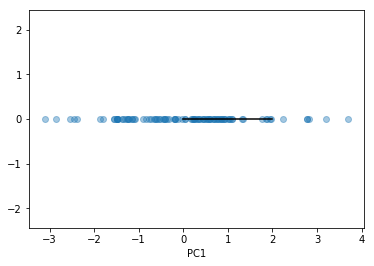

In [60]:
# Plot transformed dataset
plt.scatter(PC1[:,0], len(PC)*[0], alpha=.4)

# Plot first principal component in black
plt.plot([0,2], [0,0], 'k')

# Set axes
plt.xlabel('PC1')
plt.axis('equal')
# Clear text residue
plt.show()

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="item-data"></span>
# 4. Item data PCA

Now let's get back to our project.

<br>
**First, scale <code style="color:crimson">item_data</code>, which you imported at the beginning of this module.**
* Name the scaled dataset <code style="color:crimson">item_data_scaled</code>.
* Then, display the first 5 rows. 
    * You can't use <code style="color:steelblue">.head()</code> because it's not a dataframe.
    * You must **index/slice the array** instead.

In [63]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform item_data
item_data_scaled = scaler.fit_transform(item_data)

# Display first 5 rows of item_data_scaled
item_data_scaled[:5]

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

**Next, initialize and fit an instance of the PCA transformation.**
* Keep all of the components for now (just don't pass in any argument).

In [64]:
# Initialize and fit a PCA transformation
pca = PCA()
pca.fit(item_data_scaled)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Finally, generate new "principal component features" from <code style="color:crimson">item_data_scaled</code>.**
* Name the new array <code style="color:crimson">PC_items</code>.
* Then, display the first 5 rows.

In [65]:
# Generate new features
pc_items = pca.transform(item_data_scaled)

# Display first 5 rows
pc_items[:5]

array([[  5.87614052e+00,   4.82891689e+00,  -4.95545069e-01, ...,
         -6.62646278e-04,  -4.43629806e-05,   3.41393580e-15],
       [ -4.21983747e+00,   1.22621722e+00,  -1.88191211e+00, ...,
         -2.11471782e-04,  -2.69154340e-04,  -3.15372728e-15],
       [ -1.26084676e+00,   2.38766371e+00,  -7.31483440e-02, ...,
          2.57750179e-04,  -2.05682324e-04,  -6.81746326e-16],
       [ -4.92931983e+00,  -7.14858724e-01,  -1.58093026e+00, ...,
         -1.98603886e-03,   9.92316312e-05,  -1.44155521e-15],
       [ -2.05311348e+00,   2.11095022e+00,   1.84807021e-01, ...,
         -3.43415269e-04,  -1.32981672e-04,   4.44089210e-15]])

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="explained-variance"></span>
# 5. Explained variance

Earlier, we already saw how to display the **explained variance ratio** for each of the principal components.

<br>
**It's very helpful to calculate and plot the <u>cumulative</u> explained variance.**
* This will tell us the total amount of variance we'd capture if we kept up to the n-th component.
* First, we'll use <code style="color:steelblue">np.cumsum()</code> to calculate the cumulative explained variance.
* Then, we'll plot it so we can see how many $PC$ features we'd need to keep in order to capture most of the original variance.

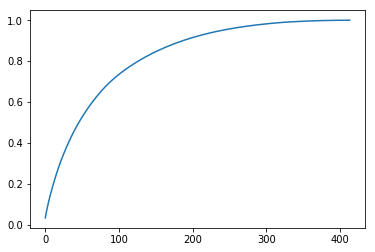

In [81]:
# Cumulative explained variance
cumul = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(len(cumul)), cumul)

In [86]:
# How much variance we'd capture with the first 125 components
cumul[124]

0.7955069032205403

**Initialize and fit another PCA transformation.**
* This time, only keep 125 components.
* Generate the principal component features from the fitted instance and name the new matrix <code style="color:crimson">PC_items</code>.
* Then, display the shape of <code style="color:crimson">PC_items</code> to confirm it only has 125 features.

In [91]:
# Initialize PCA transformation, only keeping 125 components
pca = PCA(n_components=125)

# Fit and transform item_data_scaled
PC_items = pca.fit_transform(item_data_scaled)

# Display shape of PC_items
PC_items.shape

(414, 125)

**Next, for convenience, let's put <code style="color:crimson">PC_items</code> into a new dataframe.**
* We'll also name the columns and update its index to be the same as the orginal <code style="color:crimson">item_data</code>'s index.

In [95]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = ['PC{}'.format(i+1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index = item_data.index

# Display first 5 rows
print(items_pca.shape)
print(item_data.shape)
items_pca.head()

(414, 125)
(414, 2574)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828917,-0.495520,3.093817,-0.633708,-11.534084,2.161867,7.116915,5.336035,4.424213,4.636869,2.316706,12.310705,1.986308,-11.431522,5.617799,-2.177107,7.666105,-12.135046,-16.048437,-5.949357,7.814667,40.517965,-35.573959,-17.558449,6.870565,20.886988,2.297317,-26.157811,-32.582580,7.874842,12.357173,6.824944,-32.957841,-4.408964,-17.236616,-11.270894,-14.488724,-2.775591,4.727806,-6.982853,-1.468485,10.604515,1.233745,3.087750,5.339555,-0.425263,1.640998,-6.375707,3.056444,...,2.417069,2.397380,-0.941841,-1.771471,-1.891056,1.426720,0.514714,-1.329238,-2.070995,-3.567318,0.420106,-1.873773,0.608644,0.225148,1.247913,-2.008220,0.508903,0.004995,-0.315268,0.493796,-0.405389,-0.400921,0.165516,0.615358,-0.013867,1.057333,-0.975530,-0.679759,-0.081903,1.241244,-0.159342,-0.270531,-0.371727,1.309280,-0.349017,0.671297,0.586811,0.958931,-0.049154,0.002232,0.302355,-0.472515,0.476504,-0.224732,-0.200536,-0.027148,-0.042364,-0.423895,0.035813,-0.008695
12348,-4.219840,1.226202,-1.881985,-0.174132,0.818151,1.160652,-0.872004,-0.846536,0.460069,0.854503,-0.401620,0.982186,-1.103746,0.769771,-0.093136,-0.312482,-0.450115,1.207786,0.382336,-0.468787,0.185405,0.054205,0.500452,0.372384,1.228396,-0.773669,-0.269951,0.851330,-0.370734,-0.572810,1.014038,-0.580549,0.950556,-0.731429,0.355093,-0.383835,-0.295616,0.392291,0.160758,0.350210,-0.470500,0.710040,1.215192,-0.188075,-0.878951,-0.052861,-0.425141,-1.621495,-0.396971,0.453755,...,-1.074739,-0.953274,-0.475367,-0.388051,0.009141,0.103553,-0.710915,-0.448076,0.878387,0.235083,0.352965,-0.178614,-1.843765,-0.212106,-0.570797,-0.926800,0.836838,-0.680162,-0.893861,0.599494,-0.595225,-0.383549,0.835390,1.761761,0.125760,-0.132125,0.866873,-0.600032,2.214361,0.698500,0.247440,-1.166430,-0.557828,-1.110381,0.415938,-0.024967,-0.467234,-0.579026,1.558150,-2.113024,-1.367416,0.239665,0.215433,-0.373279,1.575009,0.638675,-0.596894,0.889098,0.624630,1.614139
12349,-1.260859,2.387742,-0.073068,-1.119069,-0.034365,-3.715200,-0.343812,-0.148754,-0.790413,-0.379014,1.570175,0.182479,0.224448,-0.050740,3.177726,-0.514846,-1.840132,0.380887,0.314556,-0.008057,-0.419399,0.457422,-0.786373,1.753847,-1.476548,0.750818,-0.910373,0.768979,0.509329,-1.345238,0.288692,0.661854,0.089524,-0.210543,-0.679288,-1.523481,0.795988,-1.415155,-0.076540,-0.906351,0.098620,-0.100551,-0.161251,0.735261,1.368662,-0.219132,-0.119900,-0.187246,0.835242,1.721466,...,1.984720,-0.816916,1.820240,0.531328,1.094893,-0.326960,-0.975781,0.872205,1.101062,-0.786393,1.597392,0.316352,-2.421799,-2.113772,0.395067,-2.545474,-2.547157,0.516273,-0.633277,-2.719289,0.893431,-1.082905,1.100015,-0.528303,0.765095,-2.168206,1.002676,-0.083857,-1.656051,1.706962,-0.883322,-2.690096,1.117467,-2.203132,-0.915379,1.433624,0.870927,-4.989873,-1.697029,-0.178207,1.947340,0.927154,1.856710,4.025191,-2.420657,-1.884018,-2.681383,1.833679,0.478056,-0.407825
12350,-4.929319,-0.714873,-1.580904,-0.469924,-0.116364,0.647980,0.112872,-1.336355,1.547054,-1.190440,-0.213164,1.057978,-0.475222,0.856756,-1.305362,0.242266,0.268725,1.952552,-0.227657,0.571338,-0.186077,0.905119,1.363727,0.179568,-0.259090,-0.168340,-0.684958,1.087527,-0.153032,-0.398988,0.237813,0.633195,-1.446609,-0.183328,-0.317974,-0.300933,-1.361827,0.003148,0.571150,-0.257187,0.595285,-0.219992,0.275445,0.528773,-0.527346,-0.122843,-1.470133,0.1224

**Finally, save this item dataframe with PCA features as <code style="color:crimson">'pca_item_data.csv'</code>.**
* In <span style="color:royalblue">Module 4</span>, we'll compare the clusters made from using these features against those in <code style="color:crimson">'threshold_item_data.csv'</code>.
* Do **not** set <code style="color:steelblue">index=None</code> because we want to keep the CustomerID's as the index.

In [96]:
# Save pca_item_data.csv
items_pca.to_csv('project_files/pca_item_data.csv')

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<br>
## Next Steps

Congratulations for making it through Project 4's Principal Component Analysis!

As a reminder, here are a few things you did in this module:
* You saw how PCA works on an oval blob.
* You contrasted plots of the original features against plots of the principal component features.
* You learned how to intepret cumulative explained variance.
* And you reduced the dimensionality of the item dataset using PCA.

In the next module, <span style="color:royalblue">Module 4: Cluster Analysis</span>, we'll see how different feature sets lead to different clusters. We'll apply K-Means clustering to the analytical base table, the threshold item features, and the PCA item features.

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>